**DATA DIRI**

---



> **NAMA** : CANDRA SIDIK DERMAWAN

> **ALAMAT**: Kota Depok, Jawa Barat

> **NO Registrasi** : 0182180121-118


**MENGUNDUH DATASET**

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-06-24 14:33:37--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.4’

rockpaperscissors.z 100%[===================>] 307.92M  6.27MB/s    in 67s     

2021-06-24 14:34:45 (4.60 MB/s) - ‘rockpaperscissors.zip.4’ saved [322873683/322873683]



**MENGEKSTRAK DATASET YANG SUDAH DIUNDUH**

In [ ]:
# melakukan ekstraksi pada file zip
import os, zipfile

local_zip = '/content/rockpaperscissors.zip' 
zip_ref = zipfile.ZipFile(local_zip, 'r') 
zip_ref.extractall('/content/') 
zip_ref.close()

**MENYIAPKAN FOLDER UNTUK DIBAGI DAN MENAMPILAN GAMBAR TIAP FOLDER**


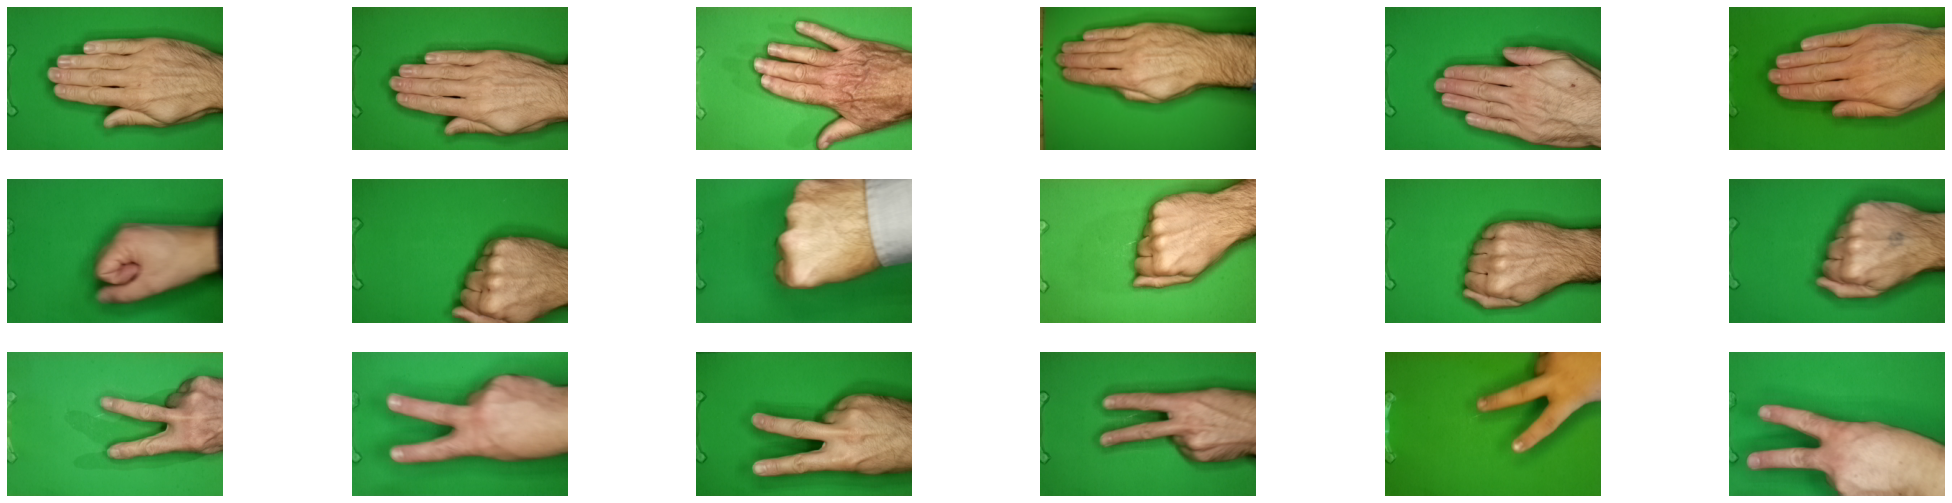

Berikut Total Jumlah tiap Folder :
Total isi folder kertas terdapat 750 gambar
Total isi folder batu terdapat 726 gambar
Total isi folder gunting terdapat 712 gambar


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

# Membuat Folder tiap gambar
fold_kertas = os.path.join('/content/rockpaperscissors/paper') 
fold_batu= os.path.join('/content/rockpaperscissors/rock') 
fold_gunting = os.path.join('/content/rockpaperscissors/scissors')

#Membuat variabel untuk lokasi tiap folder
folder_kertas = os.listdir(fold_kertas)
folder_batu = os.listdir(fold_batu)
folder_gunting = os.listdir(fold_gunting)

# Menampilkan gambar dalam 3 baris dan 6 kolom
nrows = 3
ncols = 6
pic_index = 0 

fig = plt.gcf()
fig.set_size_inches(ncols * 6, nrows * 3)
pic_index += 6 
gambar_kertas   = [os.path.join(fold_kertas, fname) 
                    for fname in folder_kertas[pic_index-6:pic_index]]
gambar_batu     = [os.path.join(fold_batu, fname) 
                    for fname in folder_batu[pic_index-6:pic_index]]
gambar_gunting  = [os.path.join(fold_gunting, fname) 
                    for fname in folder_gunting[pic_index-6:pic_index]]
for i, img_path in enumerate(gambar_kertas+ gambar_batu+ gambar_gunting):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)
                    
plt.show()

print("Berikut Total Jumlah tiap Folder :")
print("Total isi folder kertas terdapat", len(os.listdir(fold_gunting)),"gambar") 
print("Total isi folder batu terdapat", len(os.listdir(fold_batu)),"gambar")
print("Total isi folder gunting terdapat", len(os.listdir(fold_kertas)),"gambar") 

**MENGIMPLEMENTASIKAN AUGMENTASI GAMBAR**

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

base_dir = "/content/rockpaperscissors/rps-cv-images/" 
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    validation_split = 0.4
)

**PEMISAHAN DATA TRAINING DAN DATA VALIDATION**

In [ ]:
training_generator = training_datagen.flow_from_directory(
    base_dir,     
    target_size = (150, 150),  
    class_mode = "categorical",
    shuffle = True,  
    subset = "training"
)

validation_generator = training_datagen.flow_from_directory(
    base_dir,     
    target_size = (150, 150),  
    class_mode = "categorical",
    shuffle = True,  
    subset = "validation"
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**PENGGUNAAN CALLBACK**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("Pengujian berhenti karena akurasi sudah melebihi 96%!")
      self.model.stop_training = True

callbacks = myCallback()

**MEMBANGUN MODEL**

In [ ]:
model = tf.keras.models.Sequential([
    # the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

**MELATIH MODEL**

In [ ]:
history=model.fit(
    training_generator,
    steps_per_epoch=21,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=11, 
    verbose=2,
    callbacks=[callbacks]
    )

Epoch 1/100
21/21 - 28s - loss: 1.1143 - accuracy: 0.3458 - val_loss: 1.0918 - val_accuracy: 0.3750
Epoch 2/100
21/21 - 26s - loss: 1.0754 - accuracy: 0.3941 - val_loss: 1.0663 - val_accuracy: 0.4545
Epoch 3/100
21/21 - 26s - loss: 1.0803 - accuracy: 0.4720 - val_loss: 1.0035 - val_accuracy: 0.4176
Epoch 4/100
21/21 - 26s - loss: 0.9871 - accuracy: 0.5514 - val_loss: 0.9021 - val_accuracy: 0.5994
Epoch 5/100
21/21 - 27s - loss: 0.8116 - accuracy: 0.6682 - val_loss: 0.7069 - val_accuracy: 0.7273
Epoch 6/100
21/21 - 27s - loss: 0.7142 - accuracy: 0.6979 - val_loss: 0.6701 - val_accuracy: 0.7102
Epoch 7/100
21/21 - 28s - loss: 0.6194 - accuracy: 0.7574 - val_loss: 0.7630 - val_accuracy: 0.6619
Epoch 8/100
21/21 - 33s - loss: 0.5620 - accuracy: 0.7827 - val_loss: 0.3696 - val_accuracy: 0.8778
Epoch 9/100
21/21 - 29s - loss: 0.4757 - accuracy: 0.8125 - val_loss: 0.4288 - val_accuracy: 0.8551
Epoch 10/100
21/21 - 29s - loss: 0.5459 - accuracy: 0.7976 - val_loss: 0.3471 - val_accuracy: 0.8693

**MEMBUAT PLOT AKURASI TRAINING & VALIDATION**

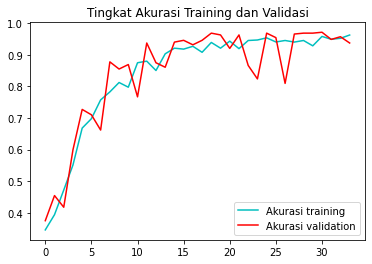

<Figure size 432x288 with 0 Axes>

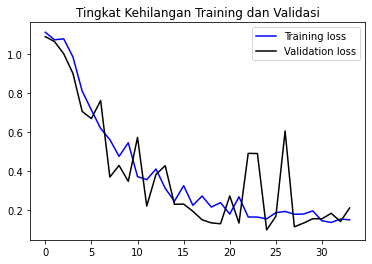

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'c', label='Akurasi training')
plt.plot(epochs, val_acc, 'r', label='Akurasi validation')
plt.title('Tingkat Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'k', label='Validation loss')
plt.title('Tingkat Kehilangan Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

**PENGUJIAN MODEL**

Saving 3YvRoN0ZGuXVWEbh.png to 3YvRoN0ZGuXVWEbh.png
3YvRoN0ZGuXVWEbh.png
Tangan membentuk Kertas


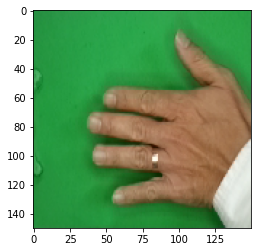

In [11]:
import numpy as np
from google.colab import files 
from keras.preprocessing import image  

uploaded = files.upload() 

for fn in uploaded.keys():
  
  path = fn
  img = image.load_img(path, target_size=(150, 150)) 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print("Tangan membentuk Kertas")                                 
  elif classes[0][1]==1:
    print("Tangan membentuk Batu")                                  
  elif classes[0][2]==1:
    print("Tangan membentuk Gunting")                                
  else:
    print("Coba Gambar lain") 